In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Dependencies

In [2]:
import os
import pandas as pd
import numpy as np
import missingno as msno
from collections import Counter

### Loading data_Netflix

In [3]:
netflix_file_path = '/content/drive/MyDrive/netflix_titles.csv'
netflix_df = pd.read_csv(netflix_file_path)
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


'director, cast, country, date_added, rating, duration' columns have missing values

In [5]:
# missing values
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

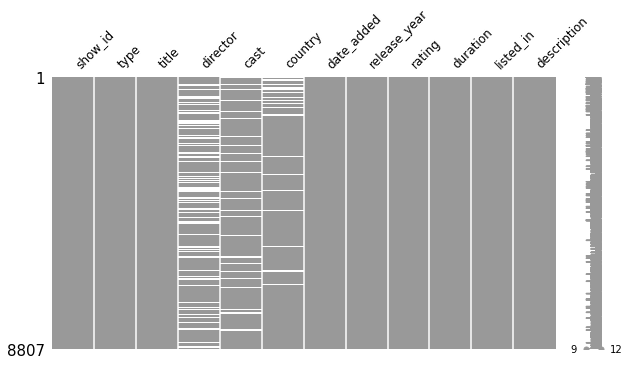

In [6]:
msno.matrix(netflix_df, figsize=(10,5), fontsize=12, color=(0.6, 0.6, 0.6))

In [7]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

'description' has no missing values but only has 8775 unique values

In [8]:
netflix_df['description'].duplicated().sum()

32

Why duplicated values?

In [9]:
# duplicated descriptions
temp = netflix_df['description']
result = Counter(temp)
for key, value in result.items():
  if value >= 2:
    print(key)

With their biggest foe seemingly defeated, InuYasha and his friends return to everyday life. But the peace is soon shattered by an emerging new enemy.
The Great Dog Demon beaqueathed one of the Three Swords of the Fang to each of his two sons. Now the evil power of the third sword has been awakened.
Mistakenly accused of an attack on the Fourth Raikage, ninja Naruto is imprisoned in the impenetrable Hozuki Castle and his powers are sealed.
A budding politician has devious plans to rise in the ranks — until an unexpected new presence begins to interfere with his every crooked move.
Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.
Cora has three sons and a daughter and she´s almost 80. One day during a family reunion the big question comes up: who will be her heir?
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embark

it seems like they used the same description for the series

### Data Pre-processing

#### Rating and Duration

In [10]:
new_df = netflix_df.copy()
new_df = new_df.dropna(subset=['rating'])
new_df.isna().sum()

show_id            0
type               0
title              0
director        2631
cast             825
country          830
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
new_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

'74 min', '84 min', '66min' seems more like duration rather than rating

In [12]:
new_df[new_df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [13]:
# replacing the duration data in 'rating'
new_df.loc[5541, 'duration'] = '74 min'
new_df.loc[5541, 'rating'] = np.nan
new_df.loc[5794, 'duration'] = '84 min'
new_df.loc[5794, 'rating'] = np.nan
new_df.loc[5813, 'duration'] = '66 min'
new_df.loc[5541, 'rating'] = np.nan

In [14]:
# removing missing values
new_df = new_df.dropna(subset=['rating'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8801 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8801 non-null   object
 1   type          8801 non-null   object
 2   title         8801 non-null   object
 3   director      6170 non-null   object
 4   cast          7976 non-null   object
 5   country       7971 non-null   object
 6   date_added    8791 non-null   object
 7   release_year  8801 non-null   int64 
 8   rating        8801 non-null   object
 9   duration      8801 non-null   object
 10  listed_in     8801 non-null   object
 11  description   8801 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.9+ KB


In [15]:
new_df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

for movies, able to identify the running time but for tv shows, only season information is provided

#### Date added

In [16]:
new_df[new_df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


too valuable to drop everything

* A Young Doctor's Notebook and Other Stories : added in 2015 / [article](https://www.whats-on-netflix.com/leaving-soon/bbcs-a-young-doctors-notebook-leaving-netflix-in-december-2019/)
* Anthony Bourdain: Parts Unknown	 : added on June 1, 2020 / [article](https://www.highsnobiety.com/p/anthony-bourdain-parts-unknown-netflix/)
* Frasier : added in April 2015 / [article](https://www.whats-on-netflix.com/leaving-soon/frasier-is-leaving-netflix-in-december-2019/)
* Friends	: added in 2015 / [article](https://www.cnbc.com/2019/12/31/friends-is-leaving-netflix-wont-be-available-to-stream-until-may.html)
* Gunslinger Girl : added in January 2016 / [article](https://en.wikipedia.org/wiki/Gunslinger_Girl)
* Kikoriki : added on July 10, 2017 / [article](https://www.facebook.com/TheRikiGroup/posts/kikoriki-on-netflixon-july-10-2017-the-leading-world-distributor-and-content-pro/1088898897878628/)
* La Familia P. Luche : can't find the date
* Maron	: added in April 2015 / [article](https://www.whats-on-netflix.com/leaving-soon/maron-seasons-1-4-leaving-netflix-in-january-2020/)
* Red vs. Blue : added in 2014 / [article](https://www.whats-on-netflix.com/leaving-soon/red-vs-blue-leaving-netflix-in-january-2020/)
* The Adventures of Figaro Pho : added on September 15, 2014 / [article](https://usa.newonnetflix.info/info/80005756)

In [17]:
new_df['date_added'][:1]

0    September 25, 2021
Name: date_added, dtype: object

adding dates
* only year info : month - January date - 1
* only month and year info : date - 1 <br/>

Note: since dates are added manually, only year info will be used

In [18]:
new_df.loc[6066, 'date_added'] = 'January 1, 2015'
new_df.loc[6174, 'date_added'] = 'June 1, 2020'
new_df.loc[6795, 'date_added'] = 'April 1, 2015'
new_df.loc[6806, 'date_added'] = 'January 1, 2015'
new_df.loc[6901, 'date_added'] = 'January 1, 2016'
new_df.loc[7196, 'date_added'] = 'July 10, 2017'
new_df.loc[7406, 'date_added'] = 'April 1, 2015'
new_df.loc[7847, 'date_added'] = 'January 1, 2014'
new_df.loc[8182, 'date_added'] = 'September 15, 2014'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [19]:
new_df = new_df.dropna(subset=['date_added'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   director      6170 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8800 non-null   object
 7   release_year  8800 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8800 non-null   object
 11  description   8800 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.8+ KB


### Director

In [20]:
new_df = new_df.drop(['director'], axis=1)
new_df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Cast and Country

In [21]:
new_df[new_df['cast'].isna()][:20]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
20,s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,NaN,NaN,"September 22, 2021",2021,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...","In the late 1970s, an accused serial rapist cl..."
45,s46,Movie,My Heroes Were Cowboys,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
69,s70,TV Show,Stories by Rabindranath Tagore,NaN,India,"September 15, 2021",2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...
74,s75,TV Show,The World's Most Amazing Vacation Rentals,NaN,NaN,"September 14, 2021",2021,TV-PG,2 Seasons,Reality TV,"With an eye for every budget, three travelers ..."


if dropped the rows with missing values, too much data will be lost

In [23]:
test_df = new_df.copy()
test_df = test_df.dropna(subset=['cast'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7975 entries, 1 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7975 non-null   object
 1   type          7975 non-null   object
 2   title         7975 non-null   object
 3   cast          7975 non-null   object
 4   country       7299 non-null   object
 5   date_added    7975 non-null   object
 6   release_year  7975 non-null   int64 
 7   rating        7975 non-null   object
 8   duration      7975 non-null   object
 9   listed_in     7975 non-null   object
 10  description   7975 non-null   object
dtypes: int64(1), object(10)
memory usage: 747.7+ KB


In [24]:
test_df = test_df.dropna(subset=['country'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7299 entries, 1 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7299 non-null   object
 1   type          7299 non-null   object
 2   title         7299 non-null   object
 3   cast          7299 non-null   object
 4   country       7299 non-null   object
 5   date_added    7299 non-null   object
 6   release_year  7299 non-null   int64 
 7   rating        7299 non-null   object
 8   duration      7299 non-null   object
 9   listed_in     7299 non-null   object
 10  description   7299 non-null   object
dtypes: int64(1), object(10)
memory usage: 684.3+ KB


make different df to use later

For Cast

In [28]:
cast_df = new_df.copy()
cast_df = cast_df.dropna(subset=['cast'])
cast_df = cast_df.drop(['country'], axis=1)
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7975 entries, 1 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7975 non-null   object
 1   type          7975 non-null   object
 2   title         7975 non-null   object
 3   cast          7975 non-null   object
 4   date_added    7975 non-null   object
 5   release_year  7975 non-null   int64 
 6   rating        7975 non-null   object
 7   duration      7975 non-null   object
 8   listed_in     7975 non-null   object
 9   description   7975 non-null   object
dtypes: int64(1), object(9)
memory usage: 685.4+ KB


For Country

In [29]:
country_df = new_df.copy()
country_df = country_df.dropna(subset=['country'])
country_df = country_df.drop(['cast'], axis=1)
country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7970 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7970 non-null   object
 1   type          7970 non-null   object
 2   title         7970 non-null   object
 3   country       7970 non-null   object
 4   date_added    7970 non-null   object
 5   release_year  7970 non-null   int64 
 6   rating        7970 non-null   object
 7   duration      7970 non-null   object
 8   listed_in     7970 non-null   object
 9   description   7970 non-null   object
dtypes: int64(1), object(9)
memory usage: 684.9+ KB


Else

In [32]:
final_df = new_df.copy()
final_df = final_df.drop(['cast', 'country'], axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   date_added    8800 non-null   object
 4   release_year  8800 non-null   int64 
 5   rating        8800 non-null   object
 6   duration      8800 non-null   object
 7   listed_in     8800 non-null   object
 8   description   8800 non-null   object
dtypes: int64(1), object(8)
memory usage: 687.5+ KB


넷플에 contents가 계속 있는게 아니라 일정 시간이 지난 후 넷플에서 없어지기도 함,, 추천해줬는데 실제 넷플에 없으면 속상할 듯